In [43]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

import h5py

import importlib
import models, utils

# Reload the models module
importlib.reload(models)
importlib.reload(utils)
from models import *
from utils import *

f_train = h5py.File("../data/QG_Images/quark-gluon_train-set_n793900.hdf5","r")
f_test_1 = h5py.File("../data/QG_Images/quark-gluon_test-set_n10000.hdf5","r")
f_test_2 = h5py.File("../data/QG_Images/quark-gluon_test-set_n139306.hdf5","r")

print(f_train.keys())
print(f_test_1.keys())
print(f_test_2.keys())

Device: cuda
<KeysViewHDF5 ['X_jets', 'm0', 'pt', 'y']>
<KeysViewHDF5 ['X', 'y']>
<KeysViewHDF5 ['X_jets', 'm0', 'pt', 'y']>


In [2]:
print(locals())

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', 'import matplotlib.pyplot as plt\nplt.rcParams.update({\'font.size\': 14})\n\nimport h5py\n\nimport importlib\nimport models, utils\n\n# Reload the models module\nimportlib.reload(models)\nimportlib.reload(utils)\nfrom models import *\nfrom utils import *\n\nf_train = h5py.File("../data/QG_Images/quark-gluon_train-set_n793900.hdf5","r")\nf_test_1 = h5py.File("../data/QG_Images/quark-gluon_test-set_n10000.hdf5","r")\nf_test_2 = h5py.File("../data/QG_Images/quark-gluon_test-set_n139306.hdf5","r")\n\nprint(f_train.keys())\nprint(f_test_1.keys())\nprint(f_test_2.keys())', 'print(locals())'], '_oh': {}, '_dh': [PosixPath('/home/ubuntu20_1/Projects_Ubuntu20/gsoc24/qml-hep/gsoc24-qml-workspace/demos')], 'In': ['', 'import matpl

In [3]:
X_train = f_train.get("X_jets")
y_train = f_train.get("y")

X_test1 = f_test_1.get("X")
y_test1 = f_test_1.get("y")

X_test2 = f_test_2.get("X_jets")
y_test2 = f_test_2.get("y")
pt_test2 = f_test_2.get("pt")
m_test2 = f_test_2.get("m0")

In [4]:
print(len(X_train), len(X_test1), len(X_test2))

793900 10000 139306


In [5]:
pt_test2.shape

print(pt_test2[:10])

[107.45191  133.12431   88.46564  111.72106  110.947655 111.129745
  87.034294  90.747     93.22315  105.96356 ]


In [6]:
m_test2.shape

(139306,)

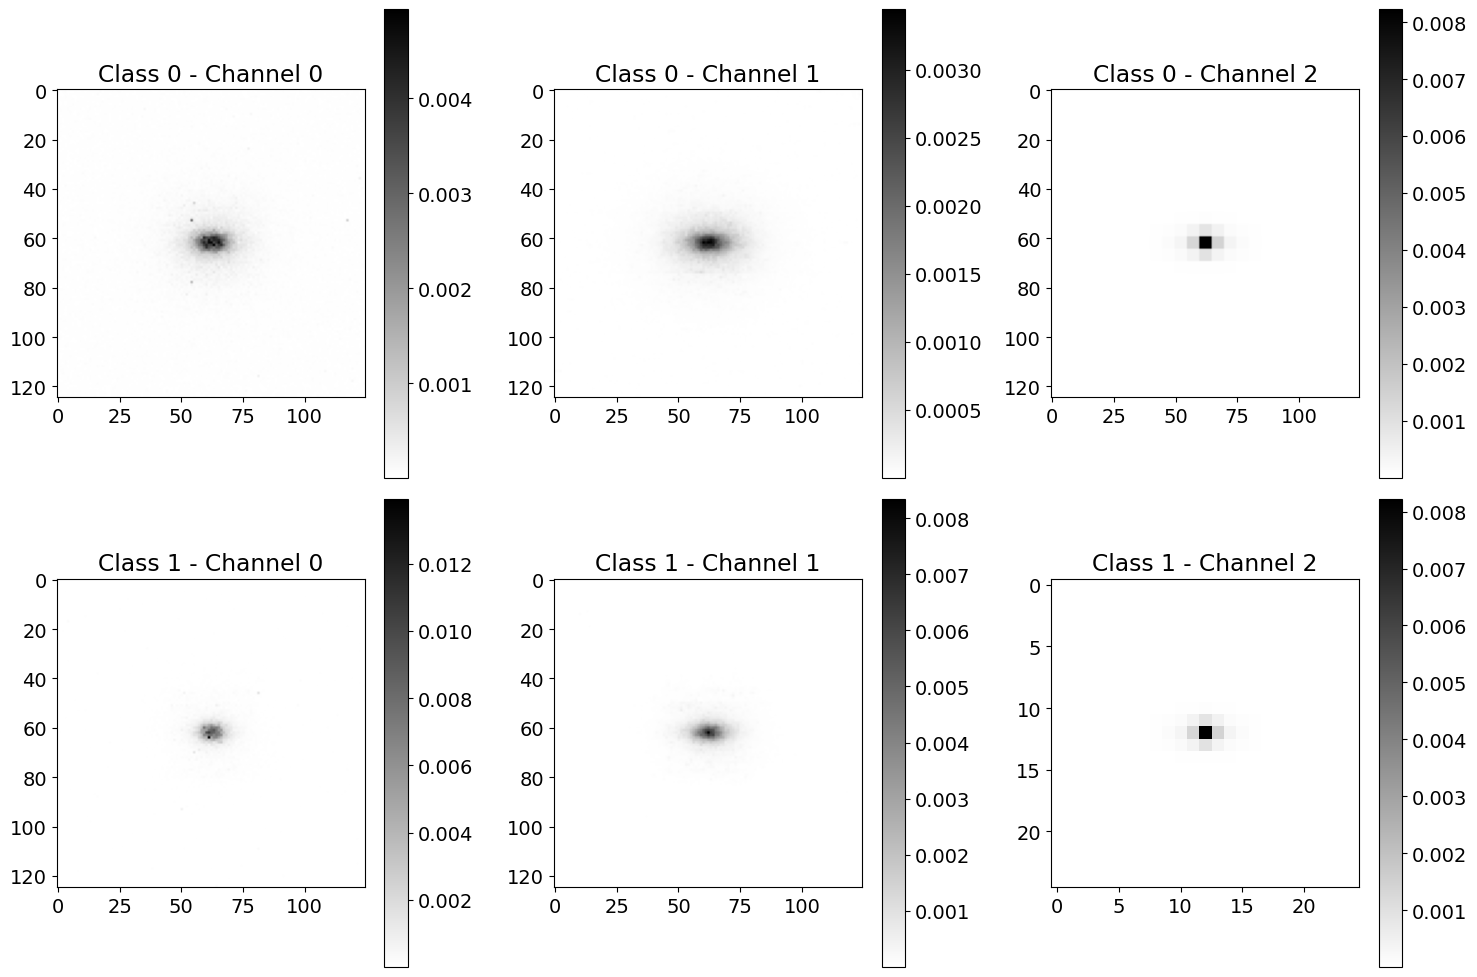

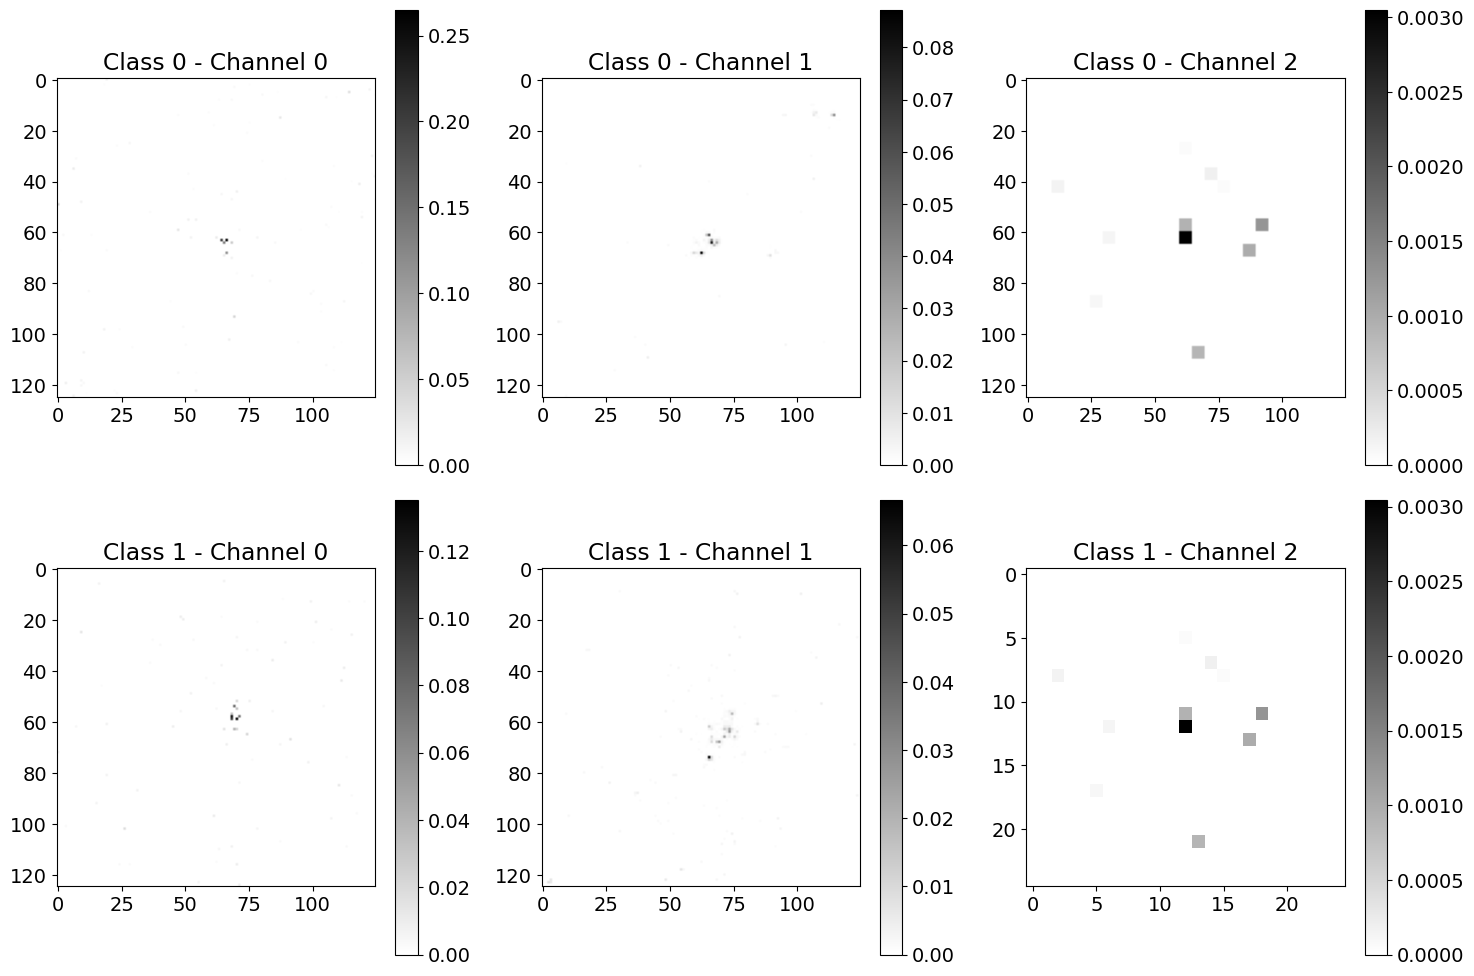

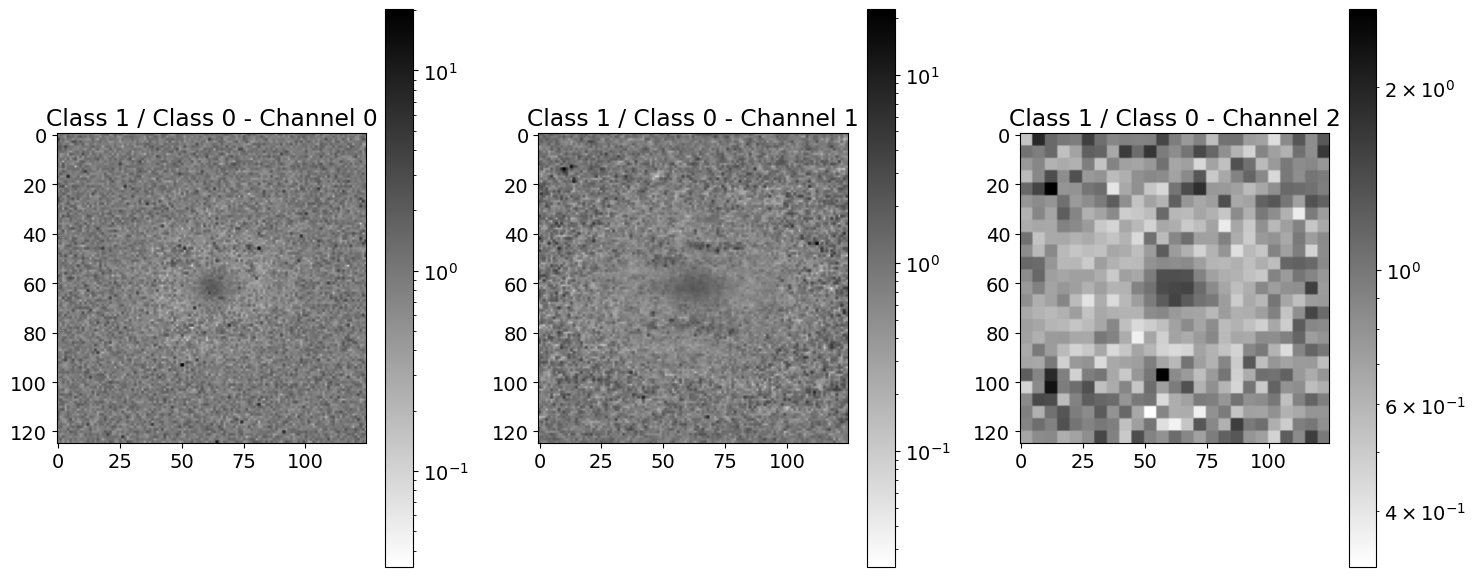

In [7]:
# visualize_average_images(X_test1[:10000], y_test1[:10000], use_lognorm=True)
visualize_average_images(X_train[:10000], y_train[:10000], use_lognorm=False)
visualize_average_images(X_train[:10000], y_train[:10000], num=1, use_lognorm=False)

visualize_diff_average_images(X_train[:10000], y_train[:10000])

In [8]:
# all_zero_images = np.all(X_test1[:, :, :, 2] == 0, axis=(1, 2))
# zero_image_indices = np.where(all_zero_images)[0]

all_zero_channels = np.all(X_test1[:, :, :, :] == 0, axis=(1, 2)) # X_test1 == 0 will result in error
# print(all_zero_channels[1533], all_zero_channels[2087])
all_zero_images = np.any(all_zero_channels, axis=1)

zero_image_indices = np.where(all_zero_images)[0]

if len(zero_image_indices) > 0:
    print(f"Found {len(zero_image_indices)} image(s) where all pixels in any channel are zero.")
    print("Indices of these images:", zero_image_indices)
else:
    print("No images found where all pixels in any channel are zero.")

Found 2 image(s) where all pixels in any channel are zero.
Indices of these images: [1533 2087]


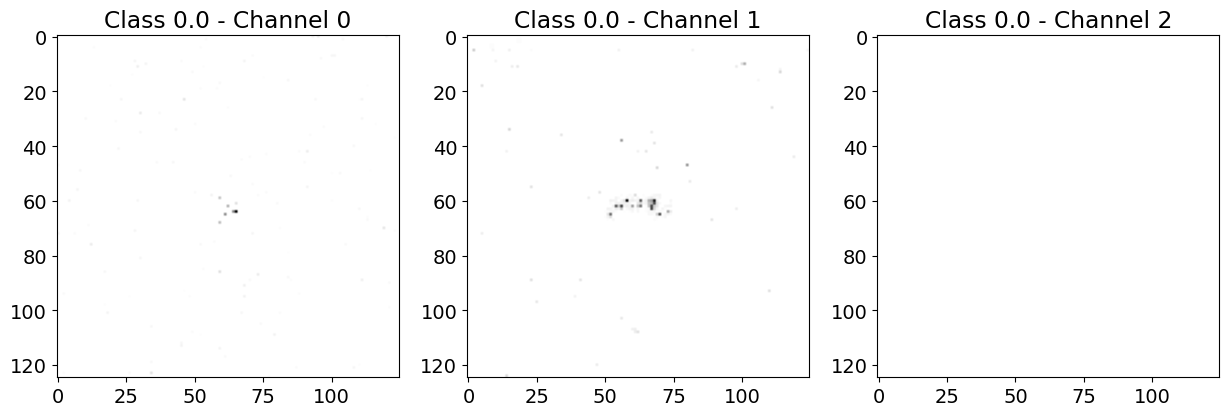

In [9]:
visualize_image(X_test1[1533], y_test1[1533])

In [10]:
X_test1_cleaned = np.delete(X_test1, [1533, 2087], axis=0)
len(X_test1_cleaned)

9998

In [11]:
dataset2 = QG_Images(images=reduce_resolution_batch(X_test1_cleaned[:5, :, :, 2]), labels=y_test1, channel=2)
print(dataset2[0])
print(dataset2[1])
print(dataset2[2])

Processing...


Data(x=[17, 1], y=[1], pos=[17, 2], num_nodes=17)
Data(x=[17, 1], y=[1], pos=[17, 2], num_nodes=17)
Data(x=[18, 1], y=[1], pos=[18, 2], num_nodes=18)


Done!


In [12]:
dataset1 = QG_Images(images=X_test1_cleaned[:5, :, :, 1], labels=y_test1, channel=1)
print(dataset1[0])
print(dataset1[1])

Data(x=[269, 1], y=[1], pos=[269, 2], num_nodes=269)
Data(x=[432, 1], y=[1], pos=[432, 2], num_nodes=432)


Processing...
Done!


In [13]:
dataset0 = QG_Images(images=X_test1_cleaned[:, :, :, 0], labels=y_test1, channel=0)
print(len(dataset0))
print(dataset0[0])
print(dataset0[1])
print(torch.min(dataset0[:].x), torch.max(dataset0[:].x))

Processing...


Done!


9998
Data(x=[59, 1], y=[1], pos=[59, 2], num_nodes=59)
Data(x=[78, 1], y=[1], pos=[78, 2], num_nodes=78)
tensor(0.0013) tensor(13.3948)


## Classifying Task

In [14]:
EPOCH = 20
BATCH_SIZE = 64

total_size = 9998

train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size

Data(x=[30, 1], y=[1], pos=[30, 2], num_nodes=30, edge_index=[2, 300])
Node degree: 10.00
Has isolated nodes: False
Has self-loops: False
Is undirected: False


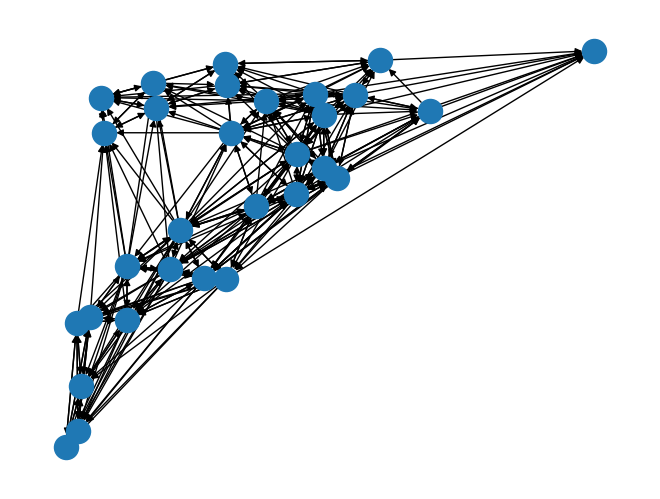

Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Logging at  logs/QG_image_c0_x__30/version_1/metrics.csv


You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                          | Type             | Params
--------------------------------------------------------------------
0  | model                         | GCN_Encoder      | 1.4 K 
1  | model.conv1                   | Custom_GCN       | 324   
2  | model.conv1.aggr_module       | SumAggregation   | 0     
3  | model.conv1.mlp               | Sequential       | 208   
4  | model.conv1.mlp.0             | Linear           | 136   
5  | model.conv1.mlp.1             | ReLU             | 0     
6  | model.conv1.mlp.2             | Linear           | 72    
7  | mode

Epoch 19: 100%|██████████| 141/141 [00:04<00:00, 29.74it/s, loss=0.602, v_num=1, val_loss=0.601, val_auc=0.744, val_acc=0.689, learning_rate=3.91e-6, train_loss=0.597]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 141/141 [00:04<00:00, 29.55it/s, loss=0.602, v_num=1, val_loss=0.601, val_auc=0.744, val_acc=0.689, learning_rate=3.91e-6, train_loss=0.597]


/home/ubuntu20_1/Miniconda3/envs/py39_qml/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:124: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Restoring states from the checkpoint path at logs/QG_image_c0_x__30/version_1/checkpoints/epoch=19-step=2500.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from che

Testing DataLoader 0: 100%|██████████| 16/16 [00:00<00:00, 45.51it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │     0.701298713684082     │
│         test_auc          │    0.7550138235092163     │
└───────────────────────────┴───────────────────────────┘

/home/ubuntu20_1/Projects_Ubuntu20/gsoc24/qml-hep/gsoc24-qml-workspace/demos/utils.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


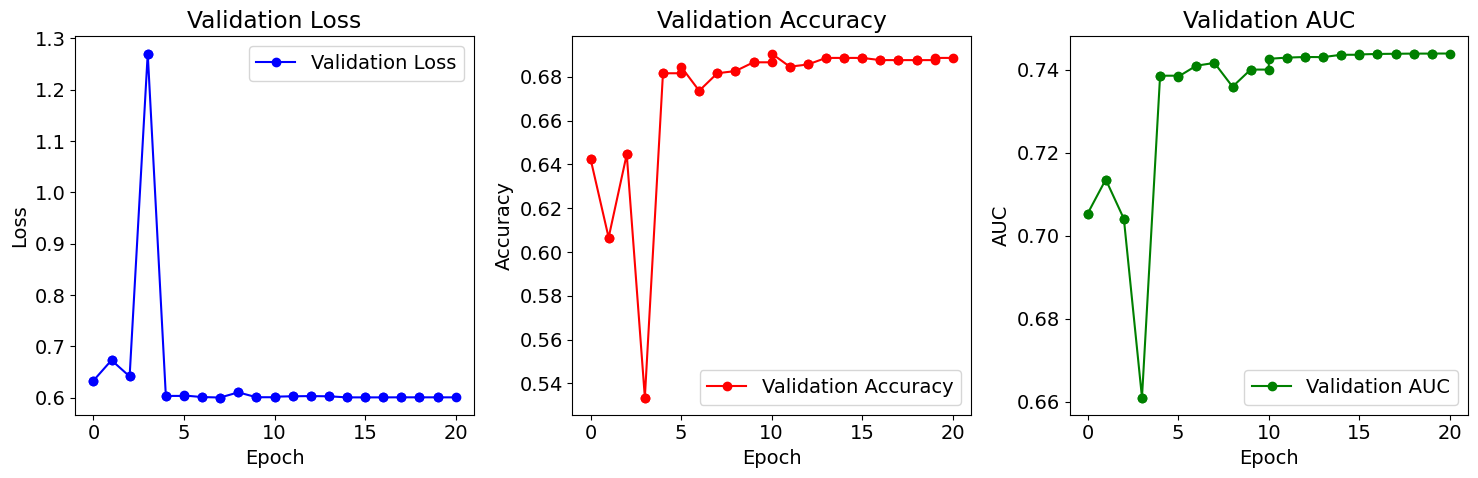

In [15]:
dataset = dataset0[:total_size]

name = "QG_image_c0_x_"
k = 30

# dataset.transform = T.Compose([TopKIntensity(k=k), KNNGroup(k=10, attr_name='x')])
dataset.transform = T.Compose([TopKIntensity(k=k), T.KNNGraph(k=10)])
sample = dataset[10]
print(sample)

print(f'Node degree: {sample.num_edges / sample.num_nodes:.2f}')
print(f'Has isolated nodes: {sample.has_isolated_nodes()}')
print(f'Has self-loops: {sample.has_self_loops()}')
print(f'Is undirected: {sample.is_undirected()}')
nx.draw(pyg.utils.to_networkx(dataset[10]))
plt.show()

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

train_loader = pyg_loader.DataLoader(train_dataset, batch_size=BATCH_SIZE, num_workers = 4)
val_loader = pyg_loader.DataLoader(val_dataset, batch_size=BATCH_SIZE, num_workers = 4)
test_loader = pyg_loader.DataLoader(test_dataset, batch_size=BATCH_SIZE, num_workers = 4)

GCN_encoder = GCN_Encoder()

Graph_pl = ModelPL_Classify(model=GCN_encoder, learning_rate=0.001)

logger = pl.loggers.CSVLogger(save_dir='logs', name=f'{name}_{k}')
version = logger.version

summary_callback = pl.callbacks.ModelSummary(max_depth=8)
callbacks = [summary_callback]

# embeddings, labels = generate_embeddings(Contrastive_Graph_pl, val_loader)
# pca_proj(embeddings, labels)
# tsne_proj(embeddings, labels)
# vmf_kde_on_circle(embeddings, labels)

trainer = pl.Trainer(max_epochs=EPOCH, 
                            accelerator='gpu',
                            callbacks=callbacks,
                            logger=logger,)

metrics_file = f'logs/{name}_{k}/version_{version}/metrics.csv'
print("Logging at ", metrics_file)

train_result = trainer.fit(Graph_pl, train_dataloaders=train_loader, val_dataloaders=val_loader)
test_result = trainer.test(dataloaders=test_loader)

plot_metrics_from_csv(metrics_file)

/home/ubuntu20_1/Projects_Ubuntu20/gsoc24/qml-hep/gsoc24-qml-workspace/demos/utils.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


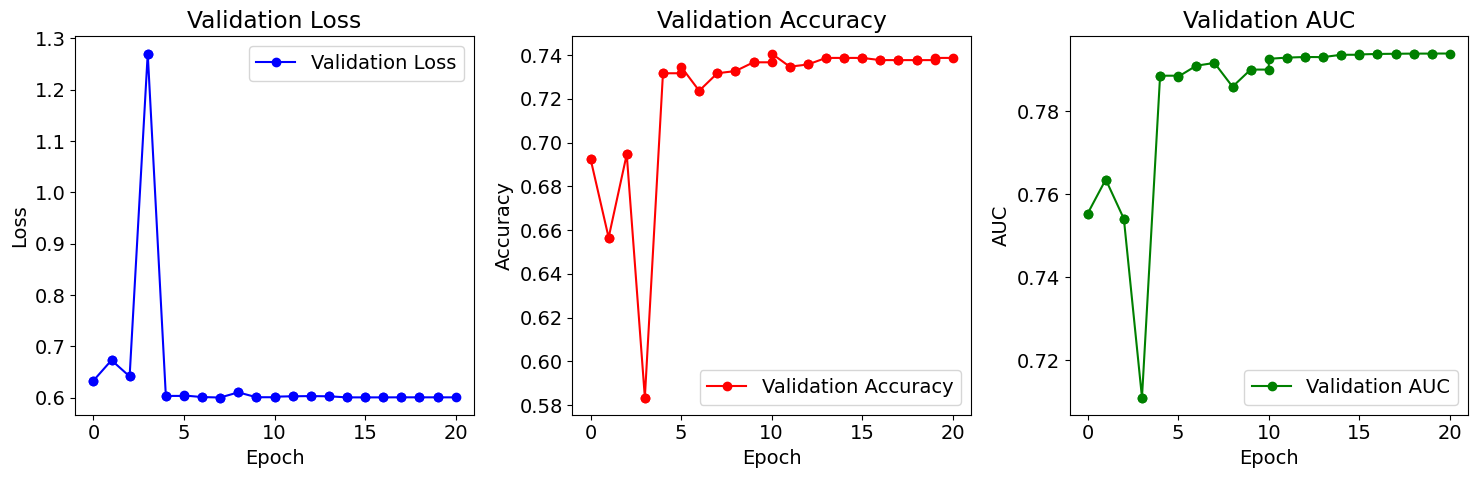

In [27]:
plot_metrics_from_csv("logs/QG_image_c0_x__30/version_1/metrics.csv")

Data(x=[32, 1], y=[1], pos=[32, 2], num_nodes=32, edge_index=[2, 320])
Node degree: 10.00
Has isolated nodes: False
Has self-loops: False
Is undirected: False


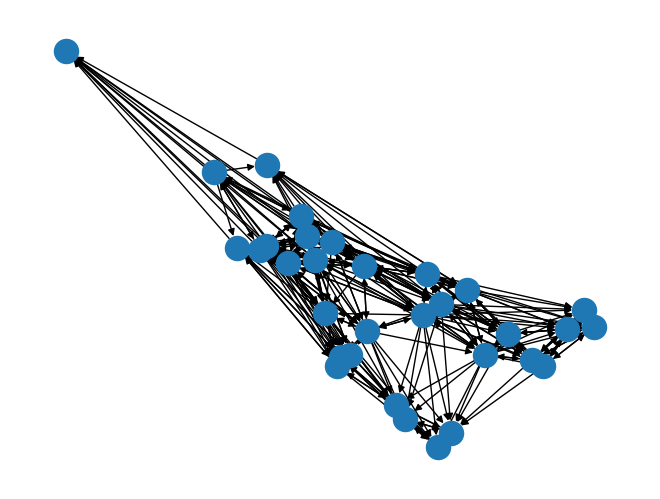

Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                          | Type             | Params
--------------------------------------------------------------------
0  | model                         | GCN_Encoder      | 1.4 K 
1  | model.conv1                   | Custom_GCN       | 32

Epoch 19: 100%|██████████| 141/141 [00:04<00:00, 28.87it/s, loss=0.597, v_num=0, val_loss=0.596, val_auc=0.753, val_acc=0.685, learning_rate=6.25e-5, train_loss=0.607]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 141/141 [00:04<00:00, 28.69it/s, loss=0.597, v_num=0, val_loss=0.596, val_auc=0.753, val_acc=0.685, learning_rate=6.25e-5, train_loss=0.607]


/home/ubuntu20_1/Miniconda3/envs/py39_qml/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:124: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Restoring states from the checkpoint path at logs/QG_image_c0_pos__200/version_0/checkpoints/epoch=19-step=2500.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from 

Testing DataLoader 0: 100%|██████████| 16/16 [00:00<00:00, 36.87it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.6613386869430542     │
│         test_auc          │    0.7216262817382812     │
└───────────────────────────┴───────────────────────────┘

/home/ubuntu20_1/Projects_Ubuntu20/gsoc24/qml-hep/gsoc24-qml-workspace/demos/utils.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


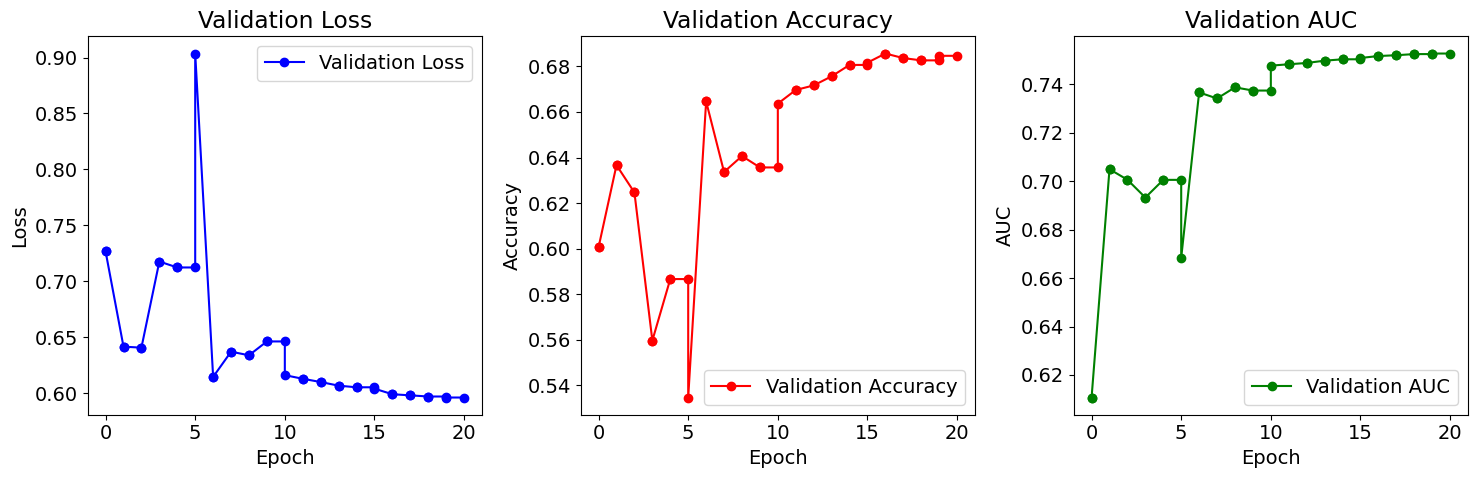

In [16]:
dataset = dataset0[:total_size]

name = "QG_image_c0_pos_"
k = 200


# dataset.transform = T.Compose([TopKIntensity(k=k), KNNGroup(k=10, attr_name='x')])
dataset.transform = T.Compose([TopKIntensity(k=k), T.KNNGraph(k=10)])
sample = dataset[10]
print(sample)

print(f'Node degree: {sample.num_edges / sample.num_nodes:.2f}')
print(f'Has isolated nodes: {sample.has_isolated_nodes()}')
print(f'Has self-loops: {sample.has_self_loops()}')
print(f'Is undirected: {sample.is_undirected()}')
nx.draw(pyg.utils.to_networkx(dataset[10]))
plt.show()

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

train_loader = pyg_loader.DataLoader(train_dataset, batch_size=BATCH_SIZE, num_workers = 4)
val_loader = pyg_loader.DataLoader(val_dataset, batch_size=BATCH_SIZE, num_workers = 4)
test_loader = pyg_loader.DataLoader(test_dataset, batch_size=BATCH_SIZE, num_workers = 4)

GCN_encoder = GCN_Encoder()

Graph_pl = ModelPL_Classify(model=GCN_encoder, learning_rate=0.001)

logger = pl.loggers.CSVLogger(save_dir='logs', name=f'{name}_{k}', version=0)

summary_callback = pl.callbacks.ModelSummary(max_depth=8)
callbacks = [summary_callback]

# embeddings, labels = generate_embeddings(Contrastive_Graph_pl, val_loader)
# pca_proj(embeddings, labels)
# tsne_proj(embeddings, labels)
# vmf_kde_on_circle(embeddings, labels)

trainer = pl.Trainer(max_epochs=EPOCH, 
                            accelerator='gpu',
                            callbacks=callbacks,
                            logger=logger,)

train_result = trainer.fit(Graph_pl, train_dataloaders=train_loader, val_dataloaders=val_loader)
test_result = trainer.test(dataloaders=test_loader)

metrics_file = f'logs/{name}_{k}/version_0/metrics.csv' 
plot_metrics_from_csv(metrics_file)

/home/ubuntu20_1/Projects_Ubuntu20/gsoc24/qml-hep/gsoc24-qml-workspace/demos/utils.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


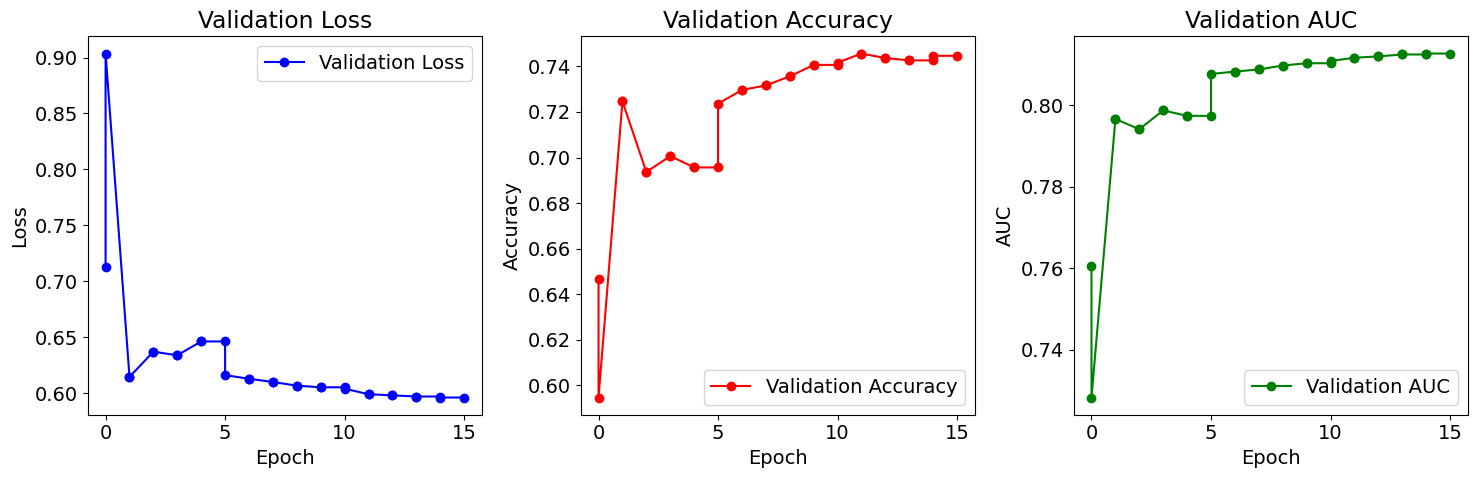

In [44]:
name = "QG_image_c0_pos_"
k = 200

metrics_file = f'logs/{name}_{k}/version_0/metrics.csv' 
plot_metrics_from_csv(metrics_file)

In [17]:
# dataset = dataset0[:total_size]
# k = 50
# dataset.transform = T.Compose([
#                                TopKIntensity(k=k), 
#                                EdgesToTopK(k=5)
#                                ]) # Bad Performance

# metrics_file = f'logs/graph_image_pl_2_{k}/version_0/metrics.csv' 
# plot_metrics_from_csv(metrics_file)

### Channel 2

In [18]:
dataset = dataset2[:total_size]

name = "QG_image_c2_x_"
k = 30

# dataset.transform = T.Compose([TopKIntensity(k=k), KNNGroup(k=10, attr_name='x')])
dataset.transform = T.Compose([TopKIntensity(k=k), T.KNNGraph(k=10)])
sample = dataset[10]
print(sample)

print(f'Node degree: {sample.num_edges / sample.num_nodes:.2f}')
print(f'Has isolated nodes: {sample.has_isolated_nodes()}')
print(f'Has self-loops: {sample.has_self_loops()}')
print(f'Is undirected: {sample.is_undirected()}')
nx.draw(pyg.utils.to_networkx(dataset[10]))
plt.show()

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

train_loader = pyg_loader.DataLoader(train_dataset, batch_size=BATCH_SIZE, num_workers = 4)
val_loader = pyg_loader.DataLoader(val_dataset, batch_size=BATCH_SIZE, num_workers = 4)
test_loader = pyg_loader.DataLoader(test_dataset, batch_size=BATCH_SIZE, num_workers = 4)

GCN_encoder = GCN_Encoder()

Graph_pl = ModelPL_Classify(model=GCN_encoder, learning_rate=0.001)

logger = pl.loggers.CSVLogger(save_dir='logs', name=f'{name}_{k}')
version = logger.version

summary_callback = pl.callbacks.ModelSummary(max_depth=8)
callbacks = [summary_callback]

# embeddings, labels = generate_embeddings(Contrastive_Graph_pl, val_loader)
# pca_proj(embeddings, labels)
# tsne_proj(embeddings, labels)
# vmf_kde_on_circle(embeddings, labels)

trainer = pl.Trainer(max_epochs=EPOCH, 
                            accelerator='gpu',
                            callbacks=callbacks,
                            logger=logger,)

metrics_file = f'logs/Q{name}_{k}/version_{version}/metrics.csv'
print("Logging at ", metrics_file)

train_result = trainer.fit(Graph_pl, train_dataloaders=train_loader, val_dataloaders=val_loader)
test_result = trainer.test(dataloaders=test_loader)

plot_metrics_from_csv(metrics_file)

IndexError: range object index out of range